ANALIZA SET DE DATE PISICI

1. VERIFICAREA CALITĂȚII DATELOR
--------------------------------------------------

Valori lipsă per coloană:
Age_Numeric    356
dtype: int64

2. ANALIZA DISTRIBUȚIEI RASELOR
--------------------------------------------------

Distribuția raselor:
Race
EUR      1022
NR        483
BEN       239
RAG       217
MCO       198
SBI       192
PER       192
BRI       166
Autre     135
NSP        80
SPH        76
ORI        58
CHA        31
TUV        28
SAV        26
Name: count, dtype: int64


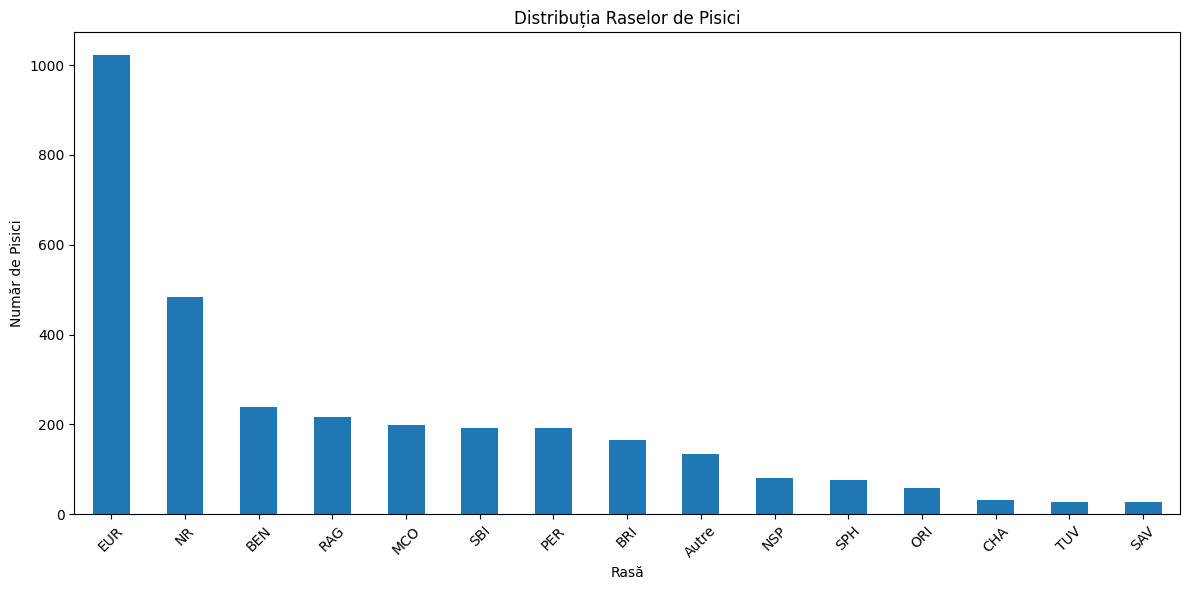


3. ANALIZA CARACTERISTICILOR DE PERSONALITATE
--------------------------------------------------


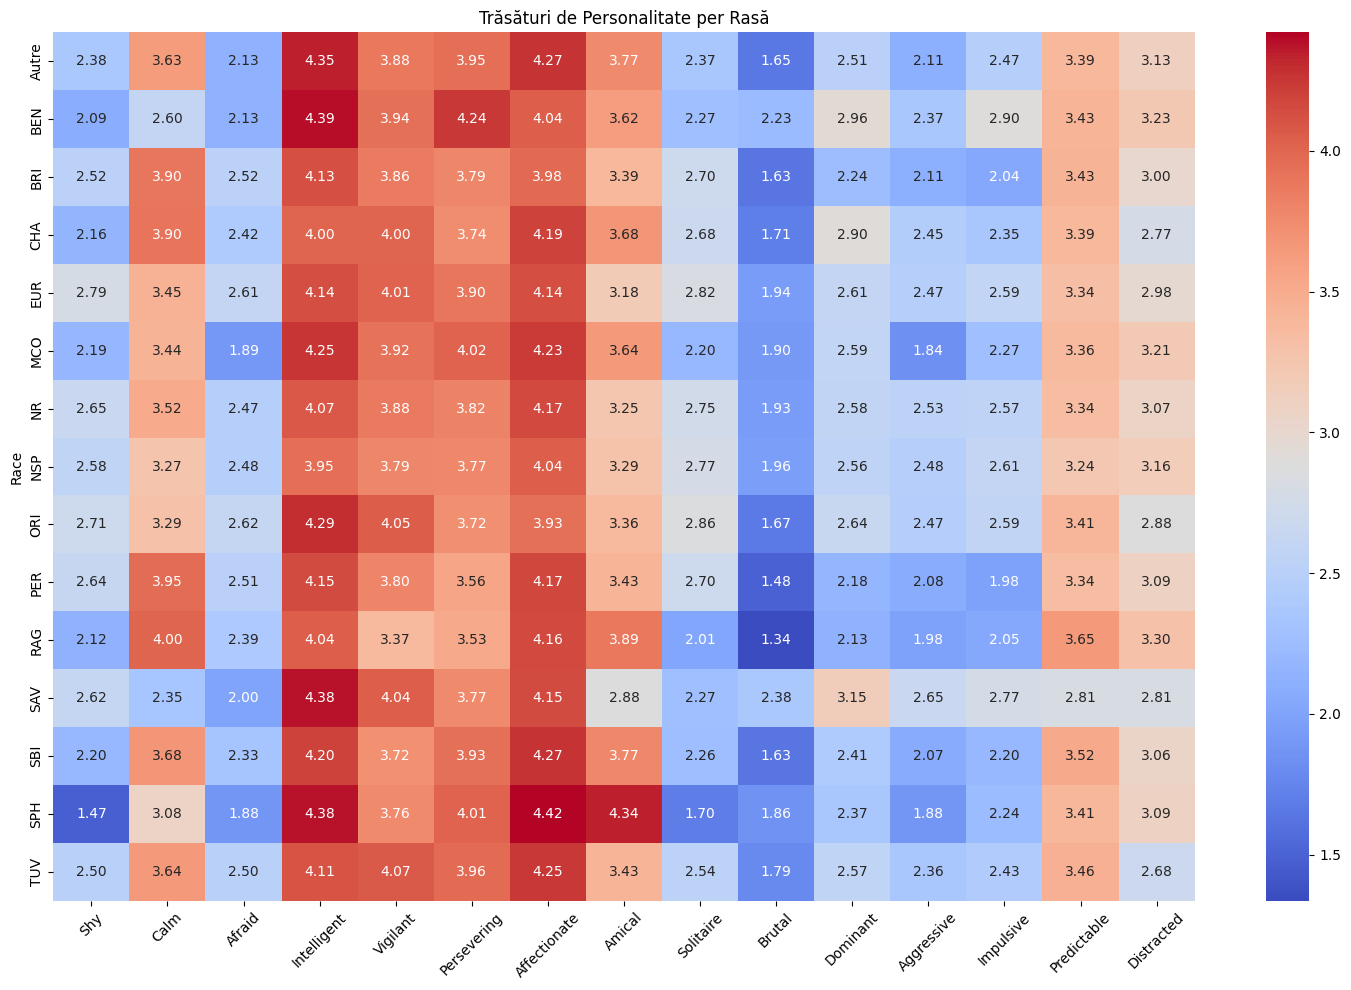


4. ANALIZA COMPORTAMENT DE VÂNĂTOARE
--------------------------------------------------


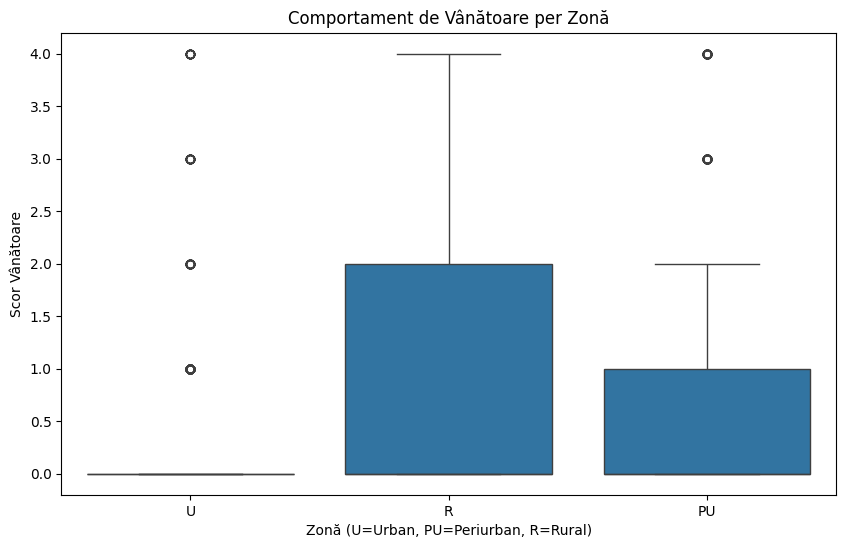


5. STATISTICI DESCRIPTIVE
--------------------------------------------------

Statistici pentru variabilele numerice:
         Row.names          Ext          Obs          Shy         Calm  \
count  3143.000000  3143.000000  3143.000000  3143.000000  3143.000000   
mean   1572.000000     1.105950     2.154629     2.503659     3.490932   
std     907.450274     1.110926     0.594600     1.381162     1.203577   
min       1.000000     0.000000     0.000000     1.000000     1.000000   
25%     786.500000     0.000000     2.000000     1.000000     3.000000   
50%    1572.000000     1.000000     2.000000     2.000000     4.000000   
75%    2357.500000     2.000000     3.000000     4.000000     4.000000   
max    3143.000000     4.000000     3.000000     5.000000     5.000000   

            Afraid  Intelligent     Vigilant  Persevering  Affectionate  ...  \
count  3143.000000  3143.000000  3143.000000  3143.000000   3143.000000  ...   
mean      2.414890     4.164811     3.881642     3.865

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def load_and_map_data(file_path):
    # Citirea datelor
    df = pd.read_excel(file_path)
    
    # Definirea mapărilor pentru variabilele categorice
    age_mapping = {
        'Less then 1': 0,
        '1a2': 1,
        '2a10': 2,
        'Plusde10': 3
    }
    
    accommodation_mapping = {
        'ASB': 0,  # Apartment without balcony
        'AAB': 1,  # Apartment with balcony
        'ML': 2,   # House in subdivision
        'MI': 3    # Individual house
    }
    
    zone_mapping = {
        'U': 0,    # Urban
        'PU': 1,   # Periurban
        'R': 2     # Rural
    }
    
    # Aplicarea mapărilor
    df['Age_Numeric'] = df['Age'].map(age_mapping)
    df['Accommodation_Numeric'] = df['Accommodation'].map(accommodation_mapping)
    df['Zone_Numeric'] = df['Zone'].map(zone_mapping)
    
    return df

def analyze_dataset(file_path='./Dataset/cats.xlsx'):
    print("ANALIZA SET DE DATE PISICI")
    print("=" * 50)
    
    try:
        df = load_and_map_data(file_path)
    except Exception as e:
        print(f"Eroare la încărcarea datelor: {e}")
        return
    
    print("\n1. VERIFICAREA CALITĂȚII DATELOR")
    print("-" * 50)
    
    # Verificare valori lipsă
    missing_values = df.isnull().sum()
    print("\nValori lipsă per coloană:")
    print(missing_values[missing_values > 0])
    
    # Verificare duplicate
    duplicates = df.duplicated()
    if duplicates.any():
        print(f"\nNumăr instanțe duplicate: {duplicates.sum()}")
    
    print("\n2. ANALIZA DISTRIBUȚIEI RASELOR")
    print("-" * 50)
    race_distribution = df['Race'].value_counts()
    print("\nDistribuția raselor:")
    print(race_distribution)
    
    # Vizualizare distribuție rase
    plt.figure(figsize=(12, 6))
    race_distribution.plot(kind='bar')
    plt.title('Distribuția Raselor de Pisici')
    plt.xlabel('Rasă')
    plt.ylabel('Număr de Pisici')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n3. ANALIZA CARACTERISTICILOR DE PERSONALITATE")
    print("-" * 50)
    
    personality_traits = ['Shy', 'Calm', 'Afraid', 'Intelligent', 'Vigilant', 
                         'Persevering', 'Affectionate', 'Amical', 'Solitaire', 
                         'Brutal', 'Dominant', 'Aggressive', 'Impulsive', 
                         'Predictable', 'Distracted']
    
    # Calcularea mediei trăsăturilor per rasă
    traits_by_race = df.groupby('Race')[personality_traits].mean()
    
    # Heatmap pentru trăsături de personalitate per rasă
    plt.figure(figsize=(15, 10))
    sns.heatmap(traits_by_race, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Trăsături de Personalitate per Rasă')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    
    print("\n4. ANALIZA COMPORTAMENT DE VÂNĂTOARE")
    print("-" * 50)
    
    # Analiza corelației între mediul de viață și comportamentul de vânătoare
    hunting_analysis = pd.DataFrame({
        'Zone': df['Zone'],
        'Hunting_Score': df['PredMamm'].astype(float)
    })
    
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Zone', y='Hunting_Score', data=hunting_analysis)
    plt.title('Comportament de Vânătoare per Zonă')
    plt.xlabel('Zonă (U=Urban, PU=Periurban, R=Rural)')
    plt.ylabel('Scor Vânătoare')
    plt.show()
    
    print("\n5. STATISTICI DESCRIPTIVE")
    print("-" * 50)
    
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    print("\nStatistici pentru variabilele numerice:")
    print(df[numeric_columns].describe())

    with open('analiza_pisici.txt', 'w', encoding='utf-8') as f:
        f.write("REZULTATE ANALIZĂ SET DE DATE PISICI\n\n")
        f.write("Distribuția raselor:\n")
        f.write(str(race_distribution))
        f.write("\n\nStatistici numerice:\n")
        f.write(str(df[numeric_columns].describe()))
    
    return df

# Rulare analiză
if __name__ == "__main__":
    df = analyze_dataset()